<a href="https://colab.research.google.com/github/surajjorwar/ml/blob/main/PCA_OF_MNST_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np


In [74]:
df = pd.read_csv('/content/drive/MyDrive/ml files/100-days-of-machine-learning-main/day47-pca/pca/train.csv')

In [75]:
#image consist of 28*28 pixels and every pixel is a column  = 784
df.shape

(42000, 785)

In [76]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#here lable is the number of an image
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
import matplotlib.pyplot as plt


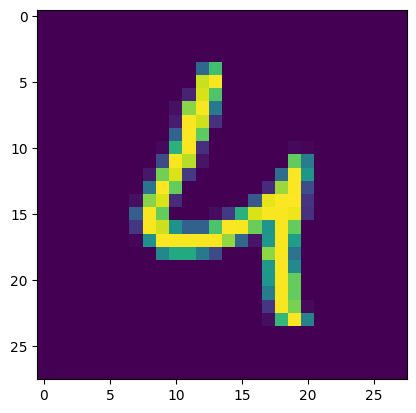

In [79]:
plt.imshow(df.iloc[25180,1:].values.reshape(28,28))

In [109]:
x= df.iloc[:,1:]
y = df.iloc[:,0]

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [112]:
x_train.shape

(33600, 784)

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier()

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
# due to high dimentional data this process will need to many computational power and time to run
# to reduce this we use PCA
y_pred = knn.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9648809523809524

# **now we will use PCA**

In [118]:
#step 1 scaling
from sklearn.preprocessing import StandardScaler
scalar  = StandardScaler()

In [119]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [131]:
#PCA ---> n_components no of principle components if none then it takes n = no of column
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [132]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [133]:
#whe have taken best 100 Principle Component
x_train_trf.shape

(33600, 200)

In [134]:
knn = KNeighborsClassifier()

In [136]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [137]:
y_pred = knn.predict(x_test_trf)

In [138]:
accuracy_score(y_pred,y_test)

0.9504761904761905

In [140]:
#checking accuracy for each principal component

for i in range(1,50):
  pca = PCA(n_components = i)
  x_train_trf = pca.fit_transform(x_train)
  x_test_trf = pca.transform(x_test)

  knn = KNeighborsClassifier()
  knn.fit(x_train_trf,y_train)

  y_pred = knn.predict(x_test_trf)

  print(accuracy_score(y_pred,y_test))




0.25833333333333336
0.32392857142857145
0.5101190476190476
0.6661904761904762
0.7378571428571429
0.8229761904761905
0.8436904761904762
0.8720238095238095
0.8866666666666667
0.9053571428571429
0.911547619047619
0.9180952380952381
0.9278571428571428
0.9353571428571429
0.9388095238095238
0.9385714285714286
0.9413095238095238
0.9408333333333333
0.9436904761904762
0.944047619047619
0.9442857142857143
0.9433333333333334
0.9447619047619048
0.9448809523809524
0.9477380952380953
0.9471428571428572
0.9465476190476191
0.9477380952380953
0.9489285714285715
0.9502380952380952
0.950595238095238
0.9511904761904761
0.9514285714285714
0.9508333333333333
0.950952380952381
0.9515476190476191
0.9530952380952381
0.9525
0.9526190476190476
0.9534523809523809
0.9527380952380953
0.9528571428571428
0.9533333333333334
0.9545238095238096
0.9530952380952381
0.9534523809523809
0.9535714285714286
0.954047619047619
0.9546428571428571
